# IRIS DECISION TREE CLASSIFICATION PROJECT (LGM)
__Name__ : SAI HARSHA REDDY CHALLA

__Batch__ : September

__Aim__  :  To Create a Decision Tree Classifier and visualize it graphically

__Type__ : MultiClass Classification

__Level__: Intermediate-project2

__Task__ :2

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import profile_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
# load dataset

iris=pd.read_csv('Iris.csv',index_col=None)
iris.head()   # first 5 samples

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris=iris.drop('Id',axis=1)
print('shape:',iris.shape)
print('size:',iris.size)
print('Features:',len(iris.columns)-1)
iris.head()

shape: (150, 5)
size: 750
Features: 4


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# data types of features
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
#info about dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Statistical Summary
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# EXPLORATORY DATA ANALYSIS (EDA)

__EDA INCLUDES :__

__1) DATA ANALYSIS AND DATA VISUALIZATION__

__2) PREPROCESSING AND FEATURE ENGINEERING__

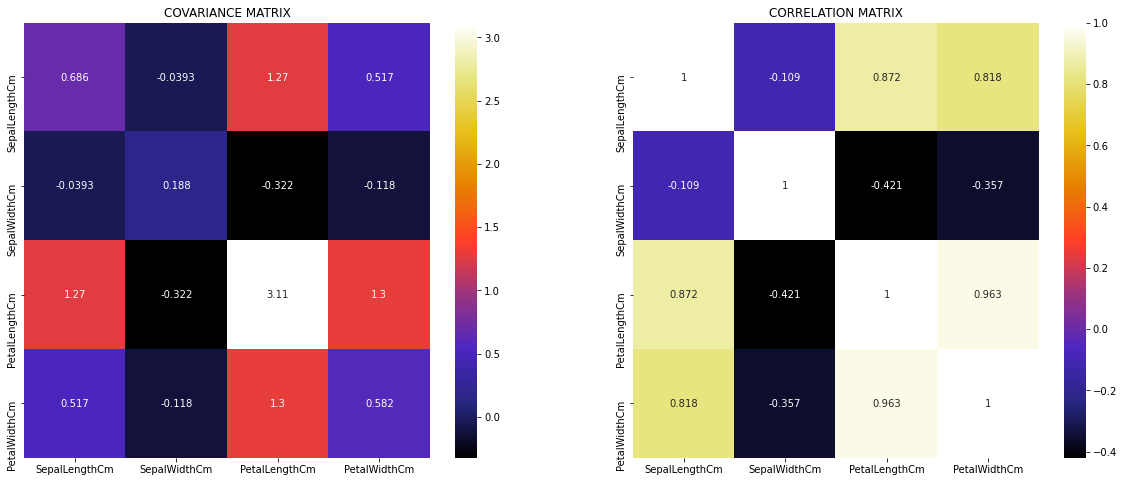

In [7]:
# checking dependencies in dataset

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.heatmap(iris.cov(),annot=True,cbar=True,fmt='0.3g',cmap='CMRmap')
plt.title('COVARIANCE MATRIX')  # direction
plt.subplot(1,2,2)
sns.heatmap(iris.corr(),annot=True,cbar=True,fmt='0.3g',cmap='CMRmap')
plt.title('CORRELATION MATRIX') # strength and direction
plt.show()

Skewness: [0.3149109566369728, 0.3340526621720866, -0.27446425247378287, -0.10499656214412734]
Kurtosis: [-0.5520640413156395, 0.2907810623654279, -1.4019208006454036, -1.3397541711393433]


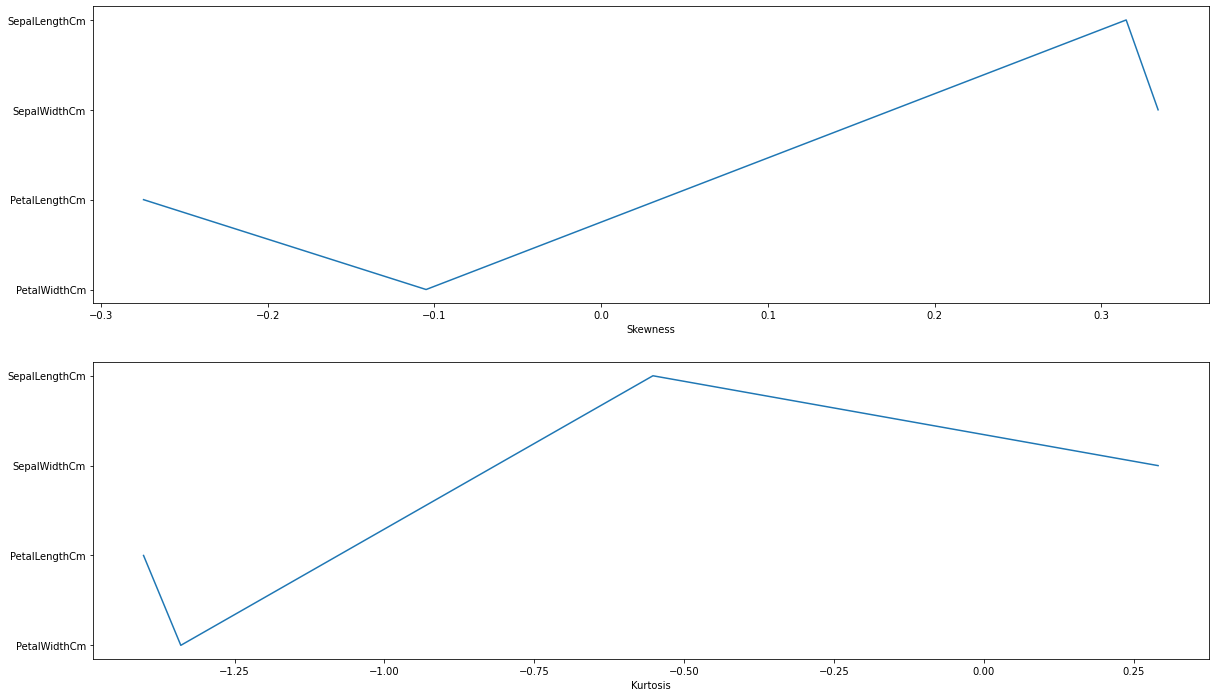

In [8]:
# Data Distribution (Skewness and Kurtosis)

plt.figure(figsize=(20,12))

skewness=[]
kurtosis=[]
features=list(iris.columns[:-1])
for feature in features:
    skewness.append(iris[feature].skew())
    kurtosis.append(iris[feature].kurtosis())
print('Skewness:',skewness)
plt.subplot(2,1,1)
sns.lineplot(x=skewness,y=features)
plt.xlabel('Skewness')
print('Kurtosis:',kurtosis)
plt.subplot(2,1,2)
sns.lineplot(x=kurtosis,y=features)
plt.xlabel('Kurtosis')
plt.show()

In [9]:
# Null Values
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
# Duplicates

iris.duplicated().sum()

3

In [11]:
# drop duplicates to reduce data redundancy

iris.drop_duplicates(inplace=True)

In [12]:
# unique values
print('No.of Unique values : ')
for feature in iris.columns:
    print(f'{feature} {iris[feature].nunique()}')
print(iris['Species'].unique())

No.of Unique values : 
SepalLengthCm 35
SepalWidthCm 23
PetalLengthCm 43
PetalWidthCm 22
Species 3
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


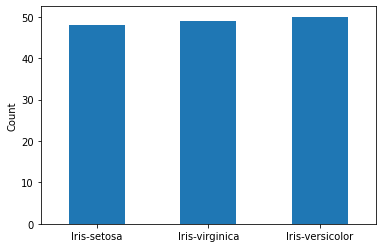

In [13]:
# Dataset Balance

iris['Species'].value_counts(ascending=True).plot(kind='bar')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


__No use of Outlier Detection,Feature Scaling in this case__

# PANDAS PROFILING USAGE

In [14]:
report=profile_report.ProfileReport(iris)
report

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
# ENCODING

le=LabelEncoder()
iris['Species']=le.fit_transform(iris.Species)
iris.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [16]:
X=iris.iloc[:,:-1]
y=iris.iloc[:,-1:]
print(X.head(3))
print(y.head(3))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
   Species
0        0
1        0
2        0


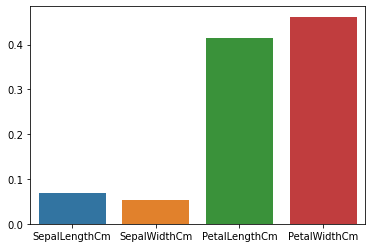

In [17]:
# FEATURE IMPORTANCE

fea_imp=ExtraTreesClassifier().fit(X,y)
sns.barplot(features,pd.Series(fea_imp.feature_importances_))
plt.show()

# MODEL BUILDING

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=11)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)


(110, 4) (37, 4) (110, 1) (37, 1)


In [19]:
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
train_1=np.round(model.score(xtrain,ytrain))*100
print('Training Score:',train_1)

Training Score: 100.0


In [20]:
ypred=model.predict(xtest)
test_1=np.round(accuracy_score(ypred,ytest)*100)
print('Testing Score:', test_1)

Testing Score: 86.0


# VISUALIZING A DECISION TREE

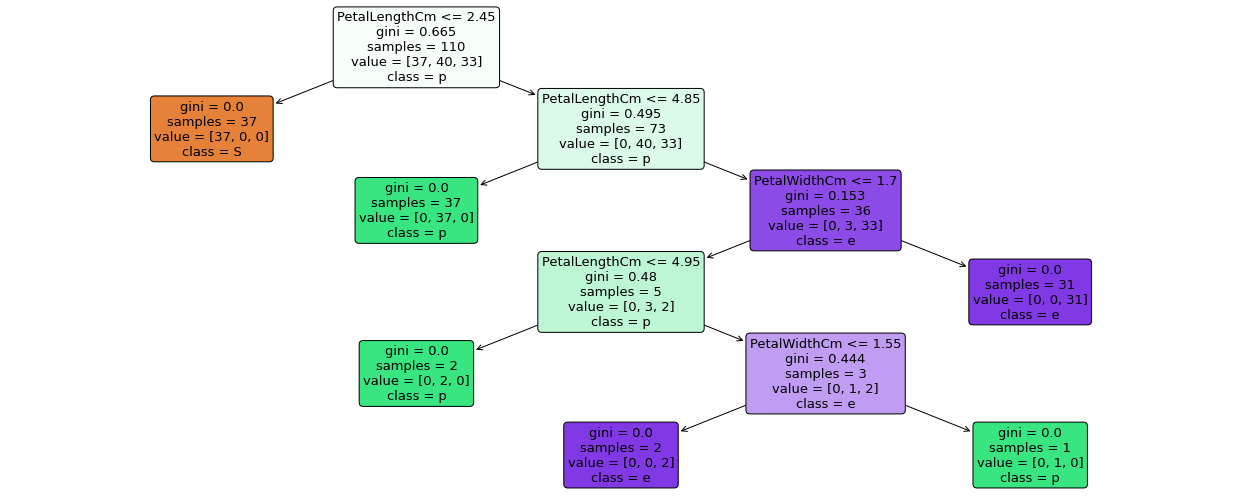

In [21]:
plt.figure(figsize=(22,9))
tree.plot_tree(model,rounded=True,feature_names=iris.columns[:-1],class_names=iris.columns[-1],filled=True)
plt.show()


# HYPER PARAMETER TUNING

__Since our model is Overfitting, we try to Tune the model to get better accuracy__


In [22]:
params={'criterion':['entropy','gini'],'max_depth':list(range(1,3)),'min_samples_leaf':list(range(1,4))}

DTC=DecisionTreeClassifier()
grid_search=GridSearchCV(DTC,cv=3,param_grid=params)
grid_search.fit(X,y)
print('Best Parameters:',grid_search.best_params_)
print('Best Score     :',grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 3}
Best Score     : 0.945578231292517


In [23]:
DTC=grid_search.best_estimator_
DTC.fit(xtrain,ytrain)
train_2=np.round(DTC.score(xtrain,ytrain)*100)
print('Training Score:',train_2)

Training Score: 97.0


In [24]:
ypred=DTC.predict(xtest)
test_2=np.round(accuracy_score(ytest,ypred)*100)
print('Testing Score:',test_2)

Testing Score: 89.0


In [25]:
print('Training and Testing Score')
print(f'Before Tuning :{train_1,test_1}')
print(f'After Tuning :{train_2,test_2}')

Training and Testing Score
Before Tuning :(100.0, 86.0)
After Tuning :(97.0, 89.0)


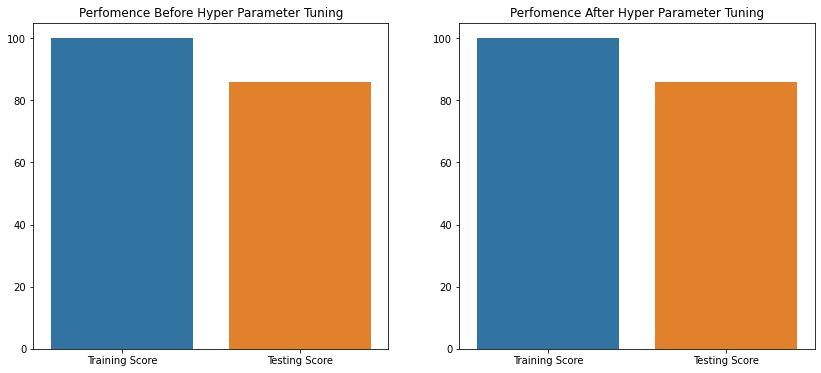

In [26]:
# Visualizing Model Performence

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x=['Training Score','Testing Score'],y=[train_1,test_1])
plt.title('Perfomence Before Hyper Parameter Tuning')
plt.subplot(1,2,2)
sns.barplot(x=['Training Score','Testing Score'],y=[train_1,test_1])
plt.title('Perfomence After Hyper Parameter Tuning')
plt.show()

# MODEL EVALUATION

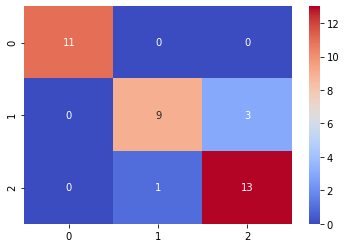

In [27]:
ypred=DTC.predict(xtest)
sns.heatmap(confusion_matrix(ypred,ytest),annot=True,cmap='coolwarm')
plt.show()

In [28]:
print('accuracy:',accuracy_score(ypred,ytest)*100)

accuracy: 89.1891891891892


In [29]:
# classification report
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.75      0.82        12
           2       0.81      0.93      0.87        14

    accuracy                           0.89        37
   macro avg       0.90      0.89      0.89        37
weighted avg       0.90      0.89      0.89        37



#  INFERENCE

In [31]:
sepal_length = input('Enter sepal length of Flower : ')
sepal_width  = input('Enter sepal width of Flower  : ')
petal_length = input('Enter petal length of Flower : ')
petal_width  = input('Enter petal width of Flower  : ')

data=[sepal_length,sepal_width,petal_length,petal_width]

def predict_species(data):
    species=DTC.predict([data])[0]
    if species == 0:
        print('\nFlower Species :','Iris-setosa')
    if species == 1:
        print('\nFlower Species :','Iris-versicolor')
    if species == 2:
        print('\nFlower Species :','Iris-virginica')
    
predict_species(data)  

Enter sepal length of Flower : 3.9
Enter sepal width of Flower  : 3
Enter petal length of Flower : 2.4
Enter petal width of Flower  : 0.2

Flower Species : Iris-setosa
